In [2]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def equations(p):
    tx, ty, a, b, c = p

    eq1 = tx - math.cos(a) - math.cos(b) - math.cos(c)
    eq2 = ty - math.sin(a) - math.sin(b) - math.sin(c)

    return [eq1, eq2]

In [4]:
#equation factory, tx, ty and either a, b or c are known
def equations_factory(tx, ty, known, value):
    def equations(p):

        if known == 'a':
            eq1 = tx - math.cos(value) - math.cos(p[0]) - math.cos(p[1])
            eq2 = ty - math.sin(value) - math.sin(p[0]) - math.sin(p[1])
        elif known == 'b':
            eq1 = tx - math.cos(p[0]) - math.cos(value) - math.cos(p[1])
            eq2 = ty - math.sin(p[0]) - math.sin(value) - math.sin(p[1])
        elif known == 'c':
            eq1 = tx - math.cos(p[0]) - math.cos(p[1]) - math.cos(value)
            eq2 = ty - math.sin(p[0]) - math.sin(p[1]) - math.sin(value)

        return [eq1, eq2]
    return equations

In [5]:
#solve equation with fsolve
def solve(tx, ty, known, value, aproximation = (0, 0)):
    equations = equations_factory(tx, ty, known, value)
    return fsolve(equations, aproximation)

[-106.29055145   34.03392041]
[-107.17798998   33.76325406]
[-107.94076515   32.57963603]
[-107.44430731   32.22365036]
[-106.48788954   31.7426568 ]
[-74.79202198   0.60265459]
[-74.50621131   0.89229064]
[-74.22198535   1.17420813]
[-49.42715488 -23.11420576]
[-49.74004873 -22.51659242]


/home/gregor/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


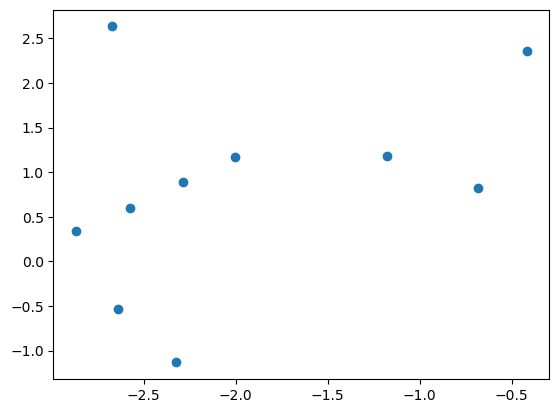

[[ 0.         -2.67055145  2.63392041]
 [ 0.69777778 -0.41798998  2.36325406]
 [ 1.39555556 -1.18076515  1.17963603]
 [ 2.09333333 -0.68430731  0.82365036]
 [ 2.79111111 -2.86788954  0.3426568 ]
 [ 0.34888889 -2.57202198  0.60265459]
 [ 1.04666667 -2.28621131  0.89229064]
 [ 1.74444444 -2.00198535  1.17420813]
 [ 2.44222222 -2.32715488 -1.13420576]
 [ 0.         -2.64004873 -0.53659242]]


In [11]:
N = 10
a_sol = np.zeros((N, 3))
b_sol = np.zeros((N, 3))
c_sol = np.zeros((N, 3))

aprox = np.zeros((1, 2))

for i, ang in enumerate(np.linspace(0, 2*3.14, N)):
    a_sol[i][1:3] = solve(1, 1, 'a', ang, aprox)
    aprox = a_sol[i][1:3]
    print(aprox)
    #b_sol[i] = solve(1, 1, 'b', ang)
    #c_sol[i] = solve(1, 1, 'c', ang)

    a_sol[i][0] = ang
    #b_sol[i][1] = ang
    #c_sol[i][2] = ang


a_sol = np.fmod(a_sol, 3.14)
#b_sol = np.fmod(b_sol, 2*3.14)
#c_sol = np.fmod(c_sol, 2*3.14)





#plot as a line
plt.scatter(a_sol[:,1], a_sol[:,2])



#show
plt.show()

print(a_sol)




In [7]:
def check_triple(tr):
    a, b, c = tr
    tx = math.cos(a) + math.cos(b) + math.cos(c)
    ty = math.sin(a) + math.sin(b) + math.sin(c)
    return tx, ty

In [12]:
for i in range(N):
    print()
    print(a_sol[i][0])
    print(check_triple(a_sol[i]))
    #print(check_triple(b_sol[i]))
    #print(check_triple(c_sol[i]))



0.0
(-0.7649747583161901, 0.032330038971437436)

0.6977777777777778
(0.9680976069994836, 0.9386894804503495)

1.3955555555555557
(0.9358238066676356, 0.9842546905090108)

2.0933333333333337
(0.9553246286869957, 0.9680506807204025)

2.7911111111111113
(-0.9601187082636317, 0.40904218943305576)

0.3488888888888888
(0.9214543655564705, 0.3694147139874329)

1.0466666666666673
(0.472159359018299, 0.8894502008456955)

1.744444444444445
(-0.2044544355240161, 0.9988758262003948)

2.4422222222222225
(-1.0286727369651292, -0.9898024469744089)

0.0
(0.9826143397064813, -0.9919901932156208)
